## This is a basic Exploratory Data Analysis of the COVID-19 dataset to understand and visualise important insights from the data graphically. This helps us to track the present situation and helps in determining the effect of relevant adopted measures on the outbreak of SARS-CoV-2 over time.

In [22]:
import kaggle
kaggle.api.authenticate()

#import statistical pacakges
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
#import visualization pacakge
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 20, 8

#setting the style format
plt.style.use('fivethirtyeight')

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [43]:
#download updated files from Kaggle using API
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -p ../data/ --unzip

100%|████████████████████████████████████████| 652k/652k [00:00<00:00, 5.01MB/s]
100%|████████████████████████████████████████| 652k/652k [00:00<00:00, 4.99MB/s]


In [45]:
#download updated files from Kaggle using API
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p ../data/india/ --unzip

  0%|                                               | 0.00/27.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 27.4k/27.4k [00:00<00:00, 3.61MB/s]


In [24]:
#Consume the overall status data of COVID-19
corona_19_data = pd.read_csv("../data/covid_19_data.csv")

COVID19_line_list_data = pd.read_csv("../data/COVID19_line_list_data.csv")
COVID19_open_line_list_data = pd.read_csv("../data/COVID19_open_line_list.csv")

#Cosume the data specifically defining the confirmed cases
corona_19_confirmed_data = pd.read_csv("../data/time_series_covid_19_confirmed.csv")

#Cosume the data specifically defining the death cases
corona_19_deaths_data = pd.read_csv("../data/time_series_covid_19_deaths.csv")

#Cosume the data specifically defining the recovered cases
corona_19_recovered_data = pd.read_csv("../data/time_series_covid_19_recovered.csv")

In [25]:
#Cleaning the by removing NA value in case of any of the mandatory column values if any
corona_19_data.dropna(inplace=True, subset =['Confirmed', 'Deaths', 'Recovered', 'ObservationDate'])

#sorting the values interms of dates in ascending order
corona_19_data = corona_19_data.sort_values('ObservationDate')

In [26]:
#calculating the sum over the metrices based on individual dates
corona_19_data_grouped_sum = corona_19_data.groupby('ObservationDate').sum()
corona_19_data_grouped_sum.drop('SNo', axis=1, inplace=True)

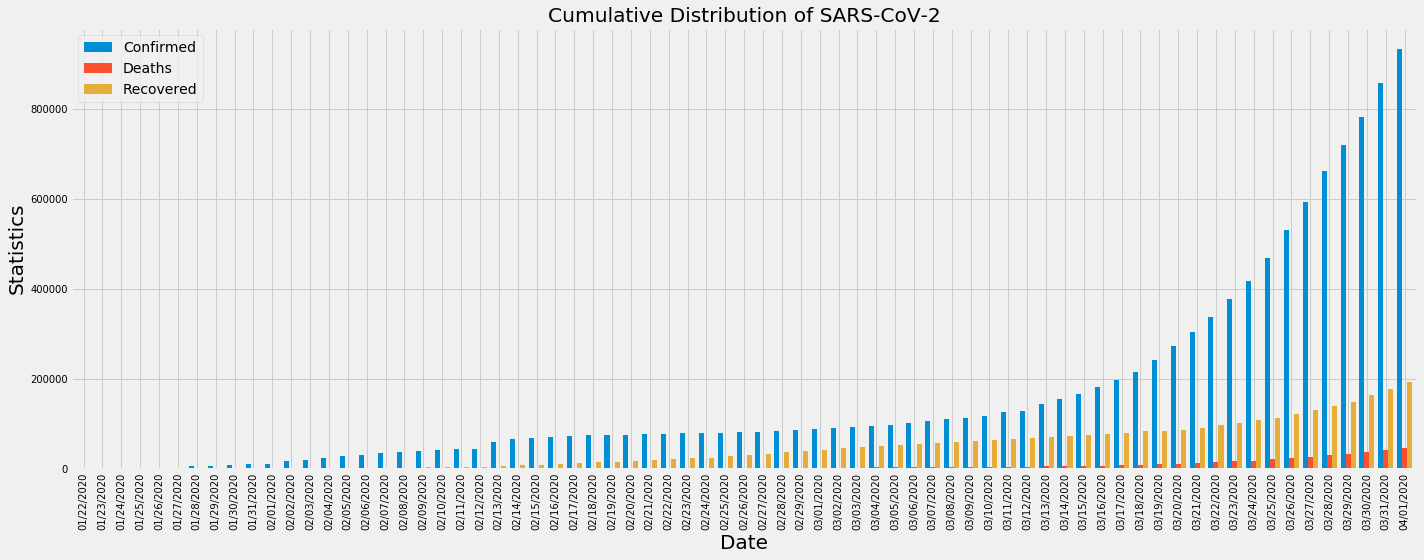

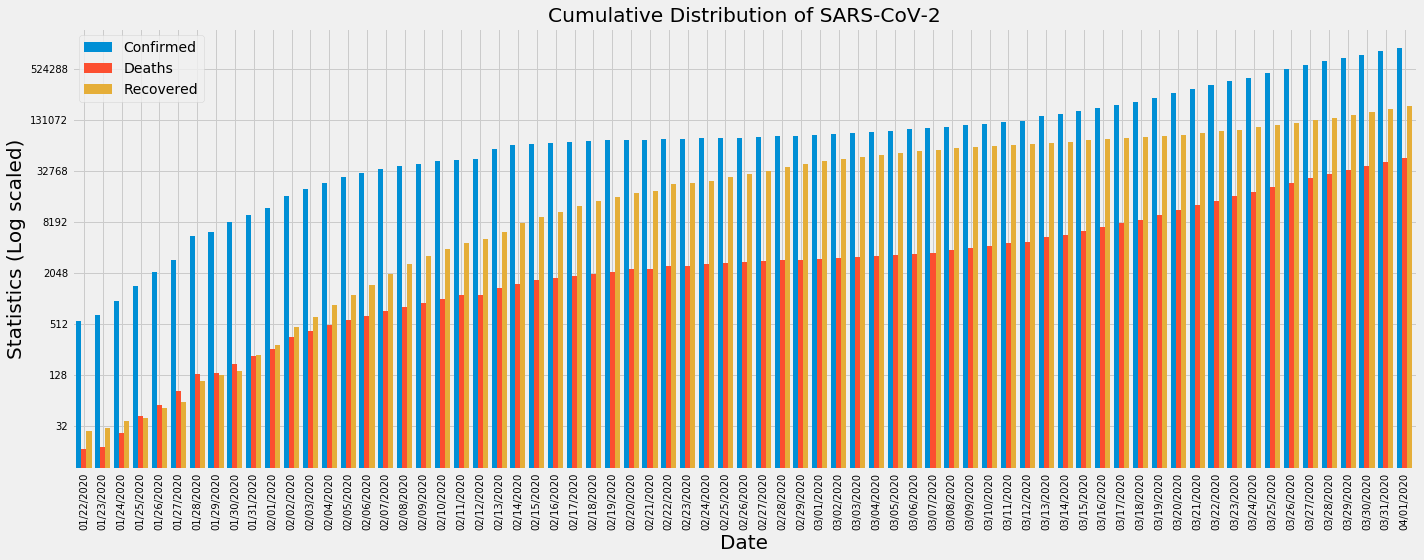

In [27]:
#plot the cumulative distribution of the metrices in normal scale
ax = corona_19_data_grouped_sum.plot(kind='bar',width=0.8,fontsize=10,title='Cumulative Distribution of SARS-CoV-2', figsize=(20,8))
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Statistics", fontsize=20)
fig= ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_status.png")

#using log scaling to intensify the values at the lowest points
ax = corona_19_data_grouped_sum.plot(kind='bar', fontsize=10, width=0.8,title='Cumulative Distribution of SARS-CoV-2', logy=True, figsize=(20,8))
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Statistics (Log scaled)", fontsize=20)
ax.set_yscale('log', basey=2)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#saving the visualization
fig= ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_status_logged.png")

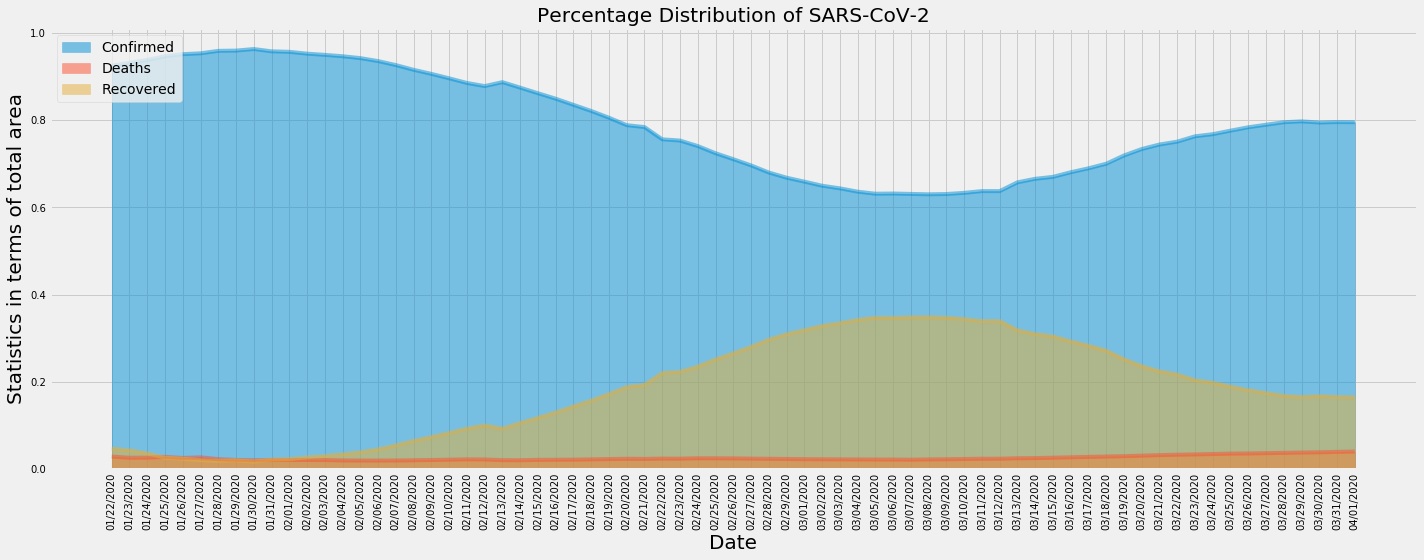

In [28]:
#plot the distribution of the metrices in terms of area 
corona_19_data_grouped_sum_area = corona_19_data_grouped_sum.divide(corona_19_data_grouped_sum.sum(axis=1), axis=0)
ax = corona_19_data_grouped_sum_area.plot(kind='area',title = "Percentage Distribution of SARS-CoV-2", 
                                          fontsize=10, stacked=False, figsize=(20,8))
plt.xticks(range(len(corona_19_data_grouped_sum_area.index)), corona_19_data_grouped_sum_area.index, rotation=90)
ax.set_ylabel("Statistics in terms of total area", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.legend(loc=(2))

#saving the visualization
fig= ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_status_percentage.png")

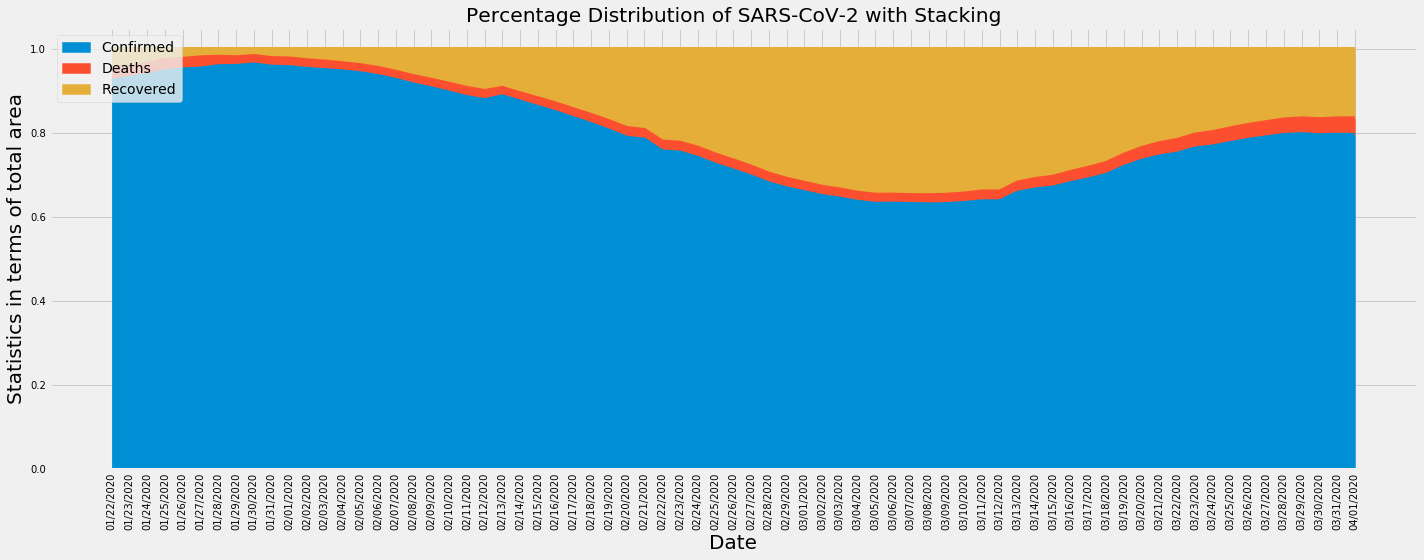

In [29]:
#plot the distribution of the metrices in terms of area 
corona_19_data_grouped_sum_area = corona_19_data_grouped_sum.divide(corona_19_data_grouped_sum.sum(axis=1), axis=0)
ax = corona_19_data_grouped_sum_area.plot(kind='area',fontsize=10, title = "Percentage Distribution of SARS-CoV-2 with Stacking", figsize=(20,8))
plt.xticks(range(len(corona_19_data_grouped_sum_area.index)), corona_19_data_grouped_sum_area.index, rotation=90)
ax.set_ylabel("Statistics in terms of total area", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.legend(loc=(2))

#saving the visualization
fig= ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_status_percentage_stacked.png")

In [30]:
corona_19_data_selected_countries_all = corona_19_data.groupby(["Country/Region", "ObservationDate"]).sum().reset_index()
corona_19_data_selected_countries_all = corona_19_data_selected_countries_all.groupby("Country/Region").max()
corona_19_data_selected_countries_all = corona_19_data_selected_countries_all.sort_values("Confirmed", ascending=False)
corona_19_data_selected_countries_all.drop('SNo',axis=1, inplace=True)

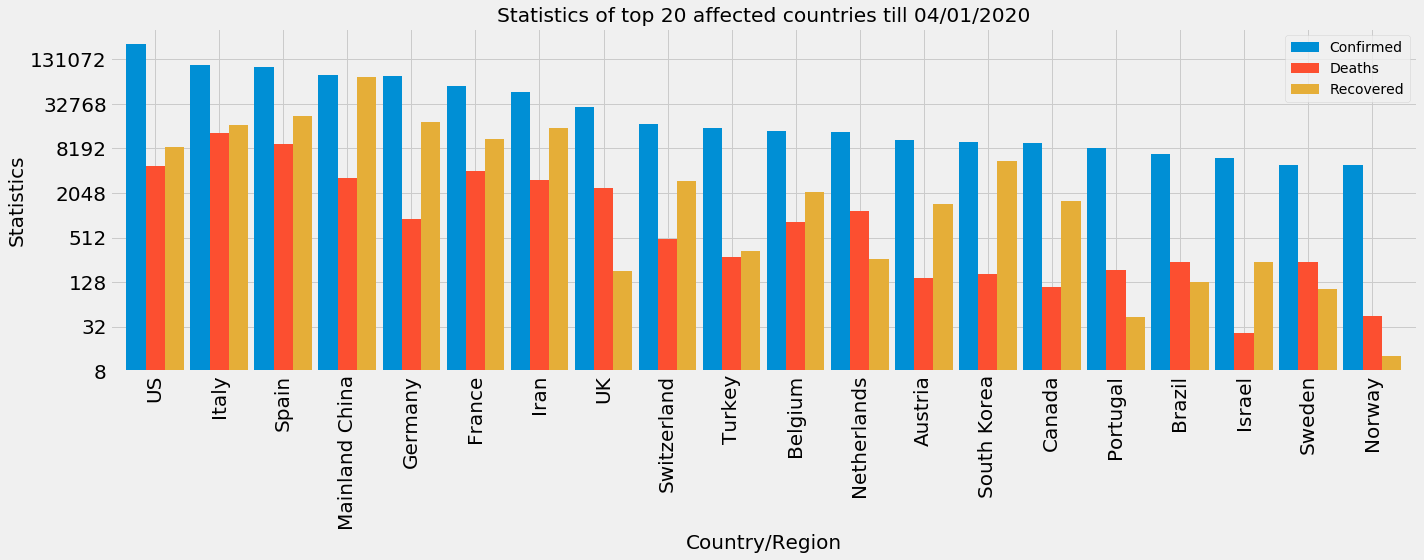

In [31]:
ax = corona_19_data_selected_countries_all.head(20).plot(kind='bar', title= "Statistics of top 20 affected countries till %s" %max(corona_19_data_selected_countries_all.ObservationDate), 
                                            width=0.9, fontsize=20, figsize=(20,8))
ax.set_ylabel('Statistics', fontsize=20)

#chaning the y scaling in log for better visualization of small values
ax.set_yscale('log', basey=2)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Country/Region", fontsize=20)

#saving the visualization
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_country_status.png")

In [32]:
#calculting death rates and recovery rate of all the countries and the overall data
corona_19_data_rates_country_wise = pd.DataFrame()
corona_19_data_rates_country_wise['deathRate'] = (corona_19_data_selected_countries_all['Deaths']/
                                                      corona_19_data_selected_countries_all['Confirmed'])*100
corona_19_data_rates_country_wise['recoveryRate'] = (corona_19_data_selected_countries_all['Recovered']/
                                                         corona_19_data_selected_countries_all['Confirmed'])*100

corona_19_data_rates_country_wise.dropna(inplace=True)

#calculating percentage rate of change of comfirmed, deaths and recoveries

corona_19_data_rates= pd.DataFrame()
corona_19_data_rates['rate_of_change_infections'] = corona_19_data_grouped_sum['Confirmed'].diff().pct_change()*100
corona_19_data_rates['rate_of_change_recoveries'] = corona_19_data_grouped_sum['Recovered'].diff().pct_change()*100
corona_19_data_rates['rate_of_change_deaths'] = corona_19_data_grouped_sum['Deaths'].diff().pct_change()*100

corona_19_data_rates.dropna(inplace=True)

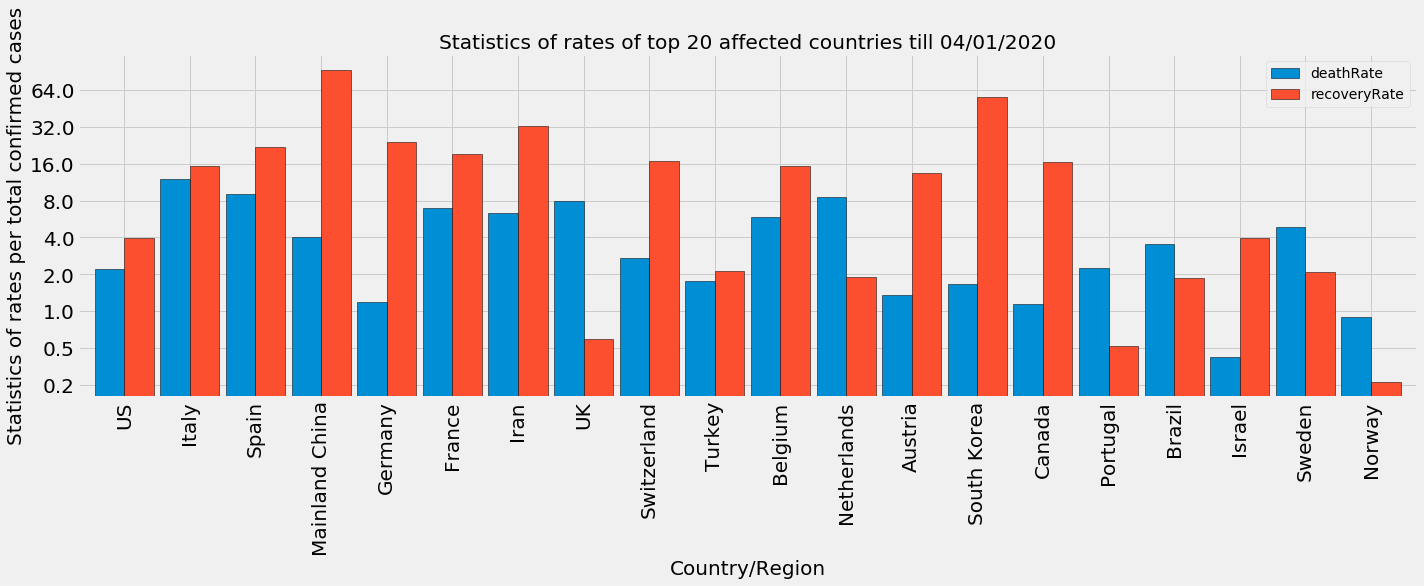

In [33]:
ax = corona_19_data_rates_country_wise.head(20).plot(kind='bar', title= "Statistics of rates of top 20 affected countries till %s" %max(corona_19_data_selected_countries_all.ObservationDate), 
                                            edgecolor='black', width=0.9,fontsize=20, figsize=(20,8))
ax.set_ylabel('Statistics of rates per total confirmed cases', fontsize=20)
ax.set_xlabel("Country/Region", fontsize=20)

#chaning the y scaling in log for better visualization of small values
ax.set_yscale('log', basey=2)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#saving the visualization
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_country_status_of_rates.png")

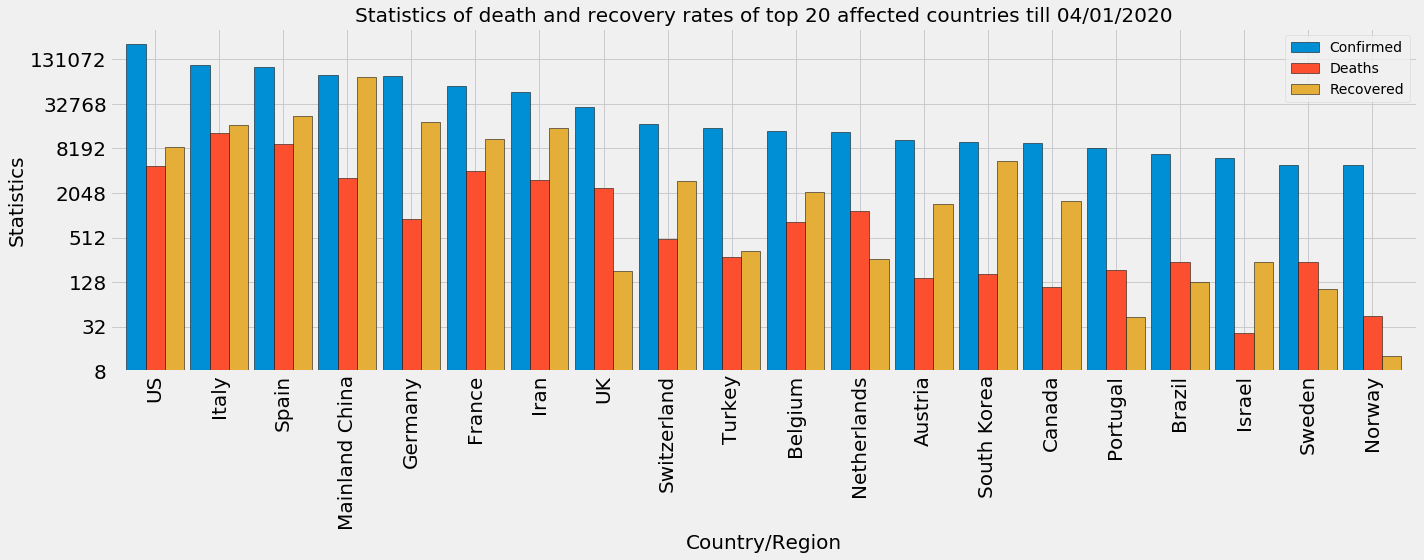

In [34]:
ax = corona_19_data_selected_countries_all.head(20).plot(kind='bar', edgecolor='black',
                                            width=0.9,fontsize=20, figsize=(20,8))
ax.set_ylabel('Statistics', fontsize=20)
ax.set_xlabel('Country/Region', fontsize=20)
ax.set_title("Statistics of death and recovery rates of top 20 affected countries till %s" %max(corona_19_data_selected_countries_all.ObservationDate), fontsize=20)

#chaning the y scaling in log for better visualization of small values
ax.set_yscale('log', basey=2)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#saving the visualization
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/COVID-19_country_status.png")

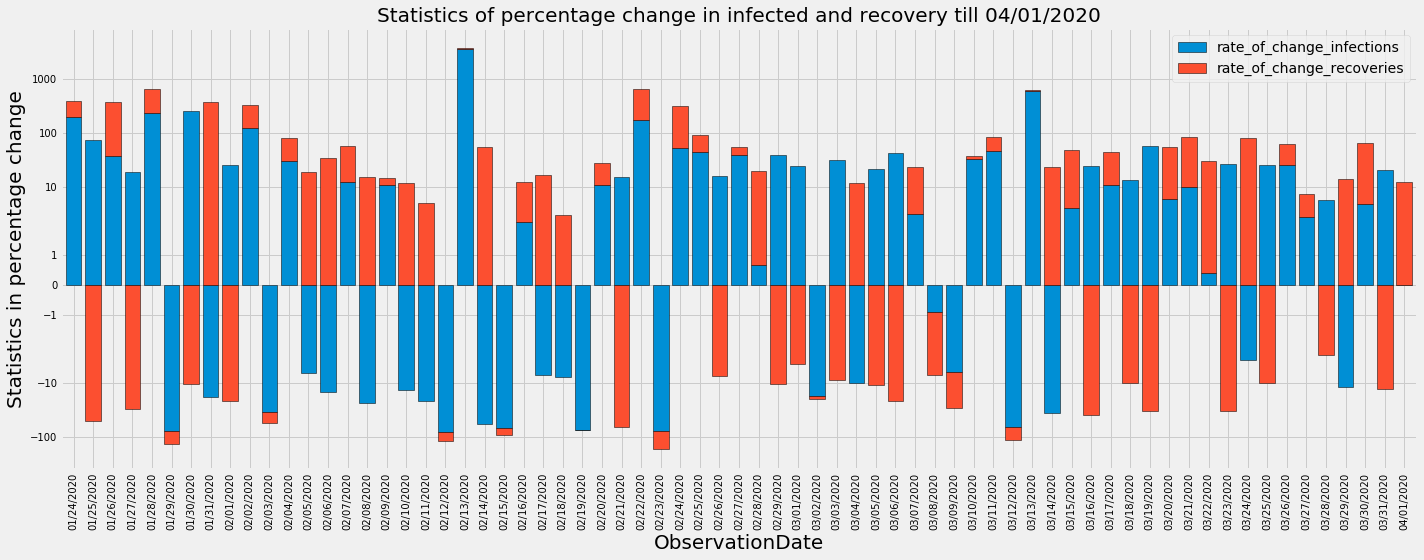

In [35]:
ax = corona_19_data_rates[['rate_of_change_infections','rate_of_change_recoveries']].plot(kind='bar', 
                               width=0.8,edgecolor='black', fontsize=10, stacked=True, figsize=(20,8))
ax.set_ylabel('Statistics in percentage change', fontsize=20)
ax.set_xlabel('ObservationDate', fontsize=20)
ax.set_title("Statistics of percentage change in infected and recovery till %s" %max(corona_19_data_rates.index), fontsize=20)

#chaning the y scaling in log for better visualization of small values
ax.set_yscale('symlog')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#saving the visualization
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../visualizations/recoveryVSinfection.png")

### This is an add-on function takes the country name as argument and produces the respective statistics like Confirmed, death, recovered case of COVID-19 till the current date

In [36]:
def country_stat(country_name):
    #filtering out the data for the Mainland China
    corona_19_data_country_specific = corona_19_data[corona_19_data["Country/Region"]==country_name]
    
    #calculating the sum over the metrices based on individual dates
    corona_19_data_country_specific = corona_19_data_country_specific.groupby('ObservationDate').sum()
    corona_19_data_country_specific.drop('SNo', axis=1, inplace=True)
    
    #plot the cumulative distribution of the metrices in normal scale
    ax = corona_19_data_country_specific.plot(kind='bar',width=0.8, title= "Statistics of %s" %country_name, fontsize=20, figsize=(20,8))
    ax.set_ylabel("Statistics",fontsize=20)
    ax.set_xlabel("Date", fontsize=20)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig("../visualizations/statistics_of_%s.png" %country_name)
    
    '''
    #plot the cumulative distribution of the metrices in log scale
    ax = corona_19_data_country_specific.plot(kind='bar',width=0.8,title= "Statistics of %s" %country_name, fontsize=20, figsize=(20,8))
    ax.set_yscale('log', basey=2)
    ax.set_ylabel("Statistics (Log scaled)", fontsize=20)
    ax.set_xlabel("Date", fontsize=20)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    '''
    # Rise of COVID-19 cases in India with an interactive chart
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=corona_19_data_country_specific.reset_index()['ObservationDate'], y = corona_19_data_country_specific['Confirmed'], mode='lines+markers',name='Confirmed'))
    fig.add_trace(go.Scatter(x=corona_19_data_country_specific.reset_index()['ObservationDate'], y = corona_19_data_country_specific['Recovered'], mode='lines+markers',name='Recovered'))
    fig.add_trace(go.Scatter(x=corona_19_data_country_specific.reset_index()['ObservationDate'], y = corona_19_data_country_specific['Deaths'], mode='lines+markers',name='Deaths'))
    fig.update_layout(title_text='Trend of Coronavirus Cases in %s (Cumulative cases)' %country_name,plot_bgcolor='rgb(230, 230, 230)')
    fig.write_html("../visualizations/%s_statistics_COVID_19.html" %country_name)
    fig.show()
    
    
    #plot the distribution of the metrices in terms of area 
    corona_19_data_country_specific_nonstack = corona_19_data_country_specific.divide(corona_19_data_country_specific.sum(axis=1), axis=0)
    ax = corona_19_data_country_specific_nonstack.plot(kind='area',fontsize=20, title = "Percentage Distribution of SARS-CoV-2 wo Stacking for %s" %country_name, stacked=False, figsize=(20,8))
    plt.xticks(range(len(corona_19_data_country_specific_nonstack.index)), corona_19_data_country_specific_nonstack.index, rotation=90)
    ax.set_ylabel("Statistics in terms of total area", fontsize=20)
    ax.set_xlabel("Date", fontsize=20)
    ax.set_xlim(0, 60)
    ax.legend(loc=(2))
    
    #plot the distribution of the metrices in terms of area 
    corona_19_data_country_specific_stack = corona_19_data_country_specific.divide(corona_19_data_country_specific.sum(axis=1), axis=0)
    ax = corona_19_data_country_specific_stack.plot(kind='area',fontsize=20, title = "Percentage Distribution of SARS-CoV-2 with Stacking for %s" %country_name, figsize=(20,8))
    plt.xticks(range(len(corona_19_data_country_specific_stack.index)), corona_19_data_country_specific_stack.index, rotation=90)
    ax.set_ylabel("Statistics in terms of total area", fontsize=20)
    ax.set_xlabel("Date", fontsize=20)
    ax.legend(loc=(2))
    
    return corona_19_data_country_specific


# Analysing the present condition of a specific country

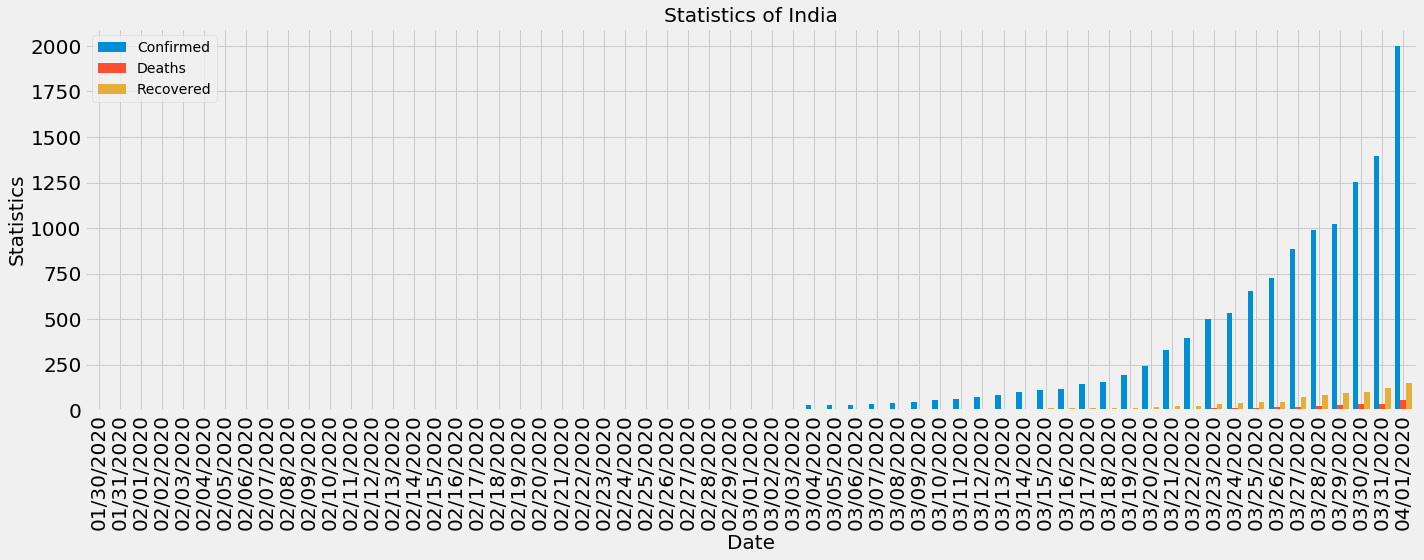

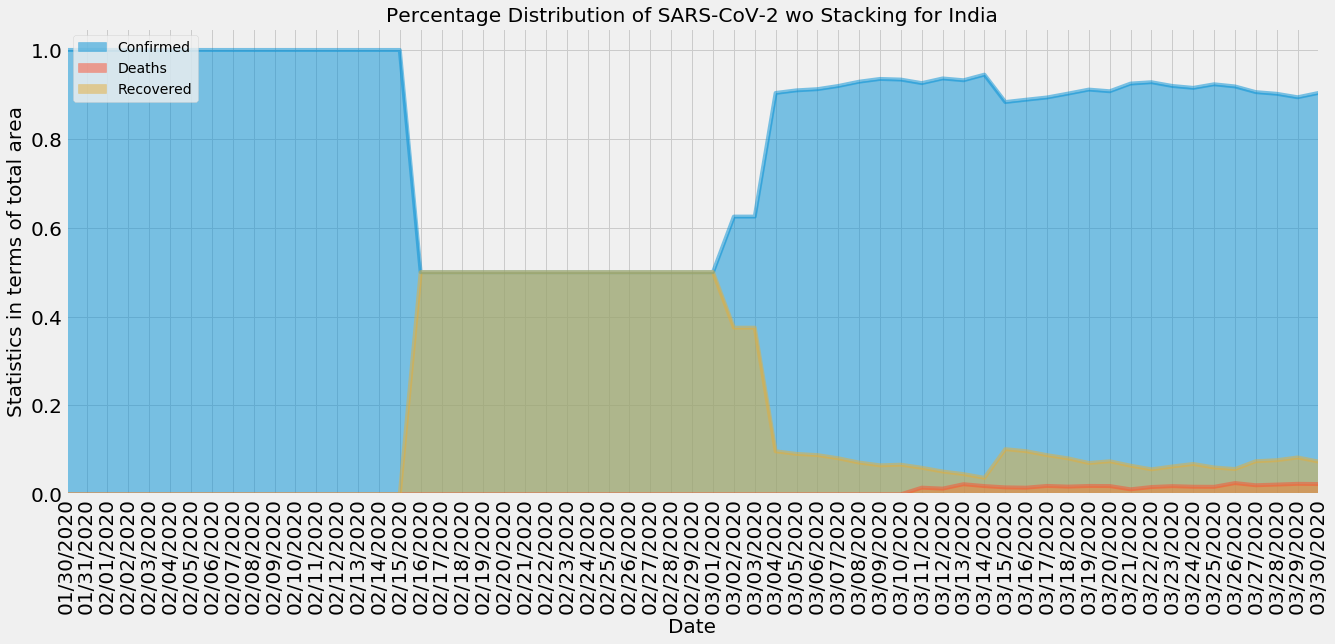

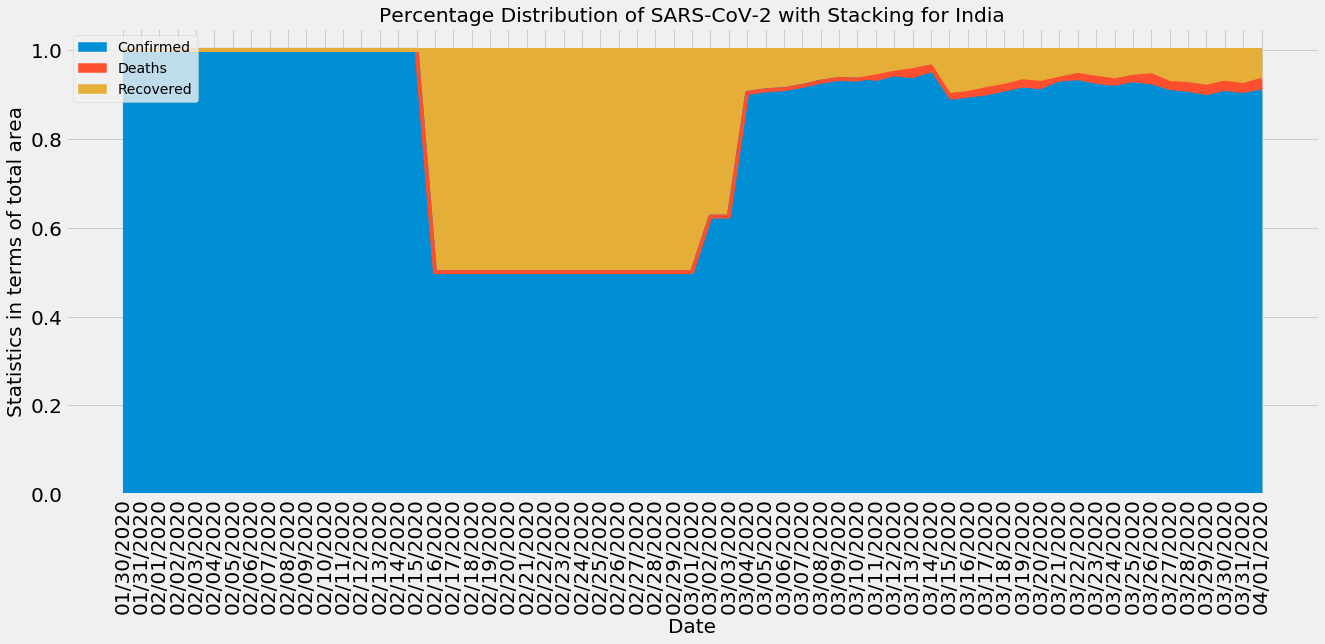

In [37]:
#calling the "country_stat" function the with the country name as argument
df_country = country_stat("India").reset_index()

## Geographically represent values of spread of COVID-19 in India

In [38]:
# Coordinates of India States and Union Territories
India_coord = pd.read_csv('../data/india/Indian Coordinates.csv')
India_coord.drop(['Unnamed: 3'],axis=1, inplace=True)
India_coord = India_coord.rename(columns= {'Name of State / UT':'State/UnionTerritory'})
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
India_coord['State/UnionTerritory'].replace("Andaman And Nicobar", "Andaman and Nicobar Islands", inplace=True)

df_India = pd.read_csv('../data/india/covid_19_india.csv')
df_state = df_India.groupby('State/UnionTerritory').max()[['Cured', 'Deaths', 'Confirmed']].reset_index()
df_state['State/UnionTerritory'] = df_state['State/UnionTerritory'].str.strip()

In [39]:
#missing states from the dataframe
set(India_coord['State/UnionTerritory'])-set(df_state['State/UnionTerritory'])

{'Arunachal Pradesh',
 'Dadra And Nagar Haveli',
 'Lakshadweep',
 'Meghalaya',
 'Nagaland',
 'Sikkim',
 'Tripura'}

In [40]:
#highlighting the dataframe
df_state.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,0,0,10
1,Andhra Pradesh,1,1,86
2,Assam,0,0,1
3,Bihar,0,1,23
4,Chandigarh,0,0,16
5,Chattisgarh,0,0,1
6,Chhattisgarh,2,0,9
7,Delhi,6,2,152
8,Goa,0,0,5
9,Gujarat,5,6,82


## Geographical represention of state wise COVID-19 statics of India

In [41]:
df_full = pd.merge(India_coord,df_state,on='State/UnionTerritory')
df_full = df_full[df_full.Confirmed!=0]
map = folium.Map(titles="Values", location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.2, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.4).add_to(map)

print("----------------------The Statsitics of Confirmed cases till the date %s------------------" 
      %max(df_India.Date))    

map.save(outfile= "../visualizations/Confirmed_cases_India.html")
map 

----------------------The Statsitics of Confirmed cases till the date 31/03/20------------------


In [42]:
df_full = pd.merge(India_coord,df_state,on='State/UnionTerritory')
df_full = df_full[df_full.Deaths!=0]
map = folium.Map(titles="Values", location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Deaths'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*3, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.4).add_to(map)

print("----------------------The Statsitics of Confirmed cases till the date %s------------------" 
      %max(df_India.Date))    

map.save(outfile= "../visualizations/Death_cases_India.html")
map    

----------------------The Statsitics of Confirmed cases till the date 31/03/20------------------
